# HOMEWORK 4
## MATH 104C
## Amir Ostrowsky
## 5-22-2020


# 1. 
Consider the standard second order finite difference approcimation to the second derivative
>$$D_0^2u_j=\frac{u_{j-1}-2u_j+u_{j+1}}{h^2}$$
Let $v_j^{(m)}=e^{imjh}$ for $j=1,\dots,M-1,\; h=\pi/M$


## 1.a.
Prove that $$D_0^2v_j^{(m)}=\frac{2}{h^2}(\cos(mh)-1)v_j^{(m)}.$$
In other words, $\lambda_m=\frac{2}{h^2}(\cos(mh)-1)$ is an eigenvalue of the tridiagonal matrix

$$A_{h} = 
\frac{1}{h^2}\begin{bmatrix}
-2&1&0&&\dots&0\\
1&-2&1&0&\dots&0\\
&\ddots&\ddots&&\ddots&\\
0&\dots&0&1&-2&1\\
0&&\dots&0&1&-2\\
\end{bmatrix}
$$
associated with the eigenvector 
$$\mathbf v^{(m)}=
\begin{bmatrix} v_1^{(m)}\\
v_2^{(m)}\\
\vdots\\
v_{M-1}^{(m)}\\
\end{bmatrix}$$

Proof.
$$\begin{align}
D_0^2v_j^{(m)}&=\frac{1}{h^2}\left(e^{im(j-1)h}-2e^{imjh}+e^{im(j+1)h}\right)\\
&=\frac{1}{h^2}\left(e^{imjh}(e^{-imh}+e^{imh}-2)\right)\\
&=\frac{1}{h^2}\left(e^{imjh}(2\cos(mh)-2)\right)\\
&=\frac{2}{h^2}(\cos(mh)-1)e^{imjh} \;\textrm{ with }\;v_j^{(m)}=e^{imjh}\\
&=\frac{2}{h^2}(\cos(mh)-1)v_j^{(m)}
\end{align}$$

with eigenvector $\mathbf v^{(m)}$ and tridiagonal matrix $A_h$ described above. $\quad\quad\blacksquare$

## 1.b.
Prove that the farthest eigenvalue fro the origin approaches $-4/h^2$ as $h \rightarrow 0$ and use this to explain why the ODE system
$$\frac{du_j(t)}{dt}=D_0^2u_j(t),\quad j=1,2,\dots, M-1$$
is stiff.

Proof. 

The distance of the eigenvalue from the origin is $|\lambda_m - 0|$

then the maximum distance from the origin is $$\max_{m \in \mathbb R}\left|\frac{2}{h^2}(\cos(mh)-1)-0\right|=\left|\frac{2}{h^2}(\cos(\pi)-1)\right|=\left|\frac{2}{h^2}(-1-1)\right|=\frac{4}{h^2}$$

So, the farthest eigenvalue from the origin is $$\max_{m \in \mathbb R}|\lambda_m| = \left|\min_{m \in \mathbb R}\lambda_m\right|, \textrm{then } \min_{m \in \mathbb R}\lambda_m = -\frac{4}{h^2}.$$

and the minimum eigenvalue is $$\min_{m \in \mathbb R}\left|\frac{2}{h^2}(\cos(mh)-1)\right|=\left|\frac{2}{h^2}(\cos(2\pi)-1)\right|=\left|\frac{2}{h^2}(1-1)\right|=|0|=0$$

So the "stiffness ratio" is $$\frac{\max|\lambda_m|}{\min|\lambda_m|} = \lim_{h \rightarrow 0}\frac{\frac{4}{h^2}}{ {}\left|\frac{2}{h^2}(\cos(mh)-1)\right|} = \lim_{h\rightarrow 0 }\frac{2}{\cos(mh)-1} = +\infty$$

Since the "stiffness ratio" is not bounded from above then the ODE system is stiff.

#2.
**ADI.** COnsider the Heat equation in the unit square $[0,1]\times[0,1]$
$$u_t=u_{xx}+u_{yy}$$
with initial condition $$u(0,x,y)=\sin(\pi x)\sin(\pi y)$$
and the homogenous Dirichlet boundary condition $u=0$.

##2.a.
Implement the ADI method to find an approximation to this Initial boundary value problem. Determine $h$ and $k$ so that the numerical approximation is well resolved in both space and time.



In [1]:
'''
TRIDIAGONAL SQUARE MATIX SOLVER BY FACTORIZATION INTO 
UPPER TRIANGULAR TIMES LOWER TRIANGULAR MATRICES LUfactorization
INPUT: tridiagonal matrix coefficients' arrays 'a', 'b', 'c', 'd'
'a' is the vector of diagonal entries of the matrix A,
'b' is the vector of diagonal entries above 'a',
'c' is the vector of diagonal entries below 'a',
'd' is the augmented vector of matrix A
OUTPUT: the vector Z of dimension (n-1 x 1) which are the second 
derivatives of the domain nodes z_j for j = 0,...,n 
from the equation Az = d

DERIVATIVE OF U WITH RESPECT TO 't': f_U()
INPUT:
'UjMinus1' is the array of entries above the diagonal,
'Uj' is the array of diagonal entries,
'UjPlus1' is the array of entries below the diagonal,
'alpha' is sigma constant times rate of change of time over rate 
of change of x
OUTPUT: values of the Forward Euler ODE per x value

INITIAL VALUE CONDITION FUNCTION u_0():
INPUT:
'x' is value from the domain of 'X(x)'
OUTPUT: initial value of ODE at initial time step 't'= 0

VARIABLES, ARRAYS AND CONSTANTS
'ibc' is the initial boundry conditions,
'sigma' is the proportionality constant,
'maxX' is the maximal value of the domain of X, 
'N' is the number of time values, 
'M' is the number of domain values from X, 
'T' is the is the maximal time value,
'h' is the rate of change of X,
'k' is the rate of change of time,
'alpha' is defined above,
'U' is matrix of approximation values of input variables 'x' 
from the domain per time value 't'.
'''

import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits 
from matplotlib import rc
from IPython.display import display, Math, Latex

# Say, "the default sans-serif font is Palatino Linotype"
matplotlib.rcParams['font.serif'] = "Palatino Linotype"
# Then, "ALWAYS use serif fonts"
matplotlib.rcParams['font.family'] = "DejaVu Sans"
# set the default Latex font for Latex text
plt.rcParams["mathtext.fontset"] = "cm"
# set default font size
matplotlib.rcParams.update({'font.size': 12})

In [2]:
def tridiagonalSolver(a,b,c,d):
    # factorization coefficients
    m = np.array([]); l = np.array([])
    m = np.append(m, a[0])
    n = int(a.size)
    for j in range(n-1):
        l = np.append(l, c[j] / m[j] )
        m = np.append(m, a[j+1]-l[j]*b[j])
    
    # Forward substitution on Ly = d
    y = np.array([])
    y = np.append(y, d[0])
    for j in range(1,n):
        y = np.append(y, d[j]-l[j-1]*y[j-1])

    # Backward substitution to solve Ux = y
    z = np.zeros(n)
    z[n-1] = y[n-1] / (m[n-1]+0.0)
    
    for j in range(n-2, -1, -1):
        z[j] = (y[j]-b[j]*z[j+1])/m[j]
        
    return z

In [3]:
sigma=0.003;maxX=1;
N=60; M=30; T=10.0; 

# central difference approximation of 2nd derivative of 
# U^n or U* (RHS) with respect to t
def D2uRHS(UjMinus1,Uj,UjPlus1,alpha):
    cent_diff = alpha*UjPlus1 +(1-2*alpha)*Uj + alpha*UjMinus1
    return(cent_diff)

def u_0(x,y):
    return (np.sin(np.pi*x)*np.sin(np.pi*y))

def ADI(u_0,sigma,D2uRHS,maxX,M,N,T):
  h=maxX/M # \Delta x and \Delta y
  k=T/N     # \Delta t
  r=k*sigma/(2*h**2) # coefficient input of tridiagonal matrices wrt x 
  
  # initialize approximation of NxLxM matrix with Dirichlet boundary conditions
  U = np.full([N+1, M+1,M+1], 0.0)

  x,y = [j*h for j in range(M+1)],[j*h for j in range(M+1)]
  X,Y = np.meshgrid(x,y)

  # initialize conditions for first row, columns j = 0 to M-1,l = 0 to L-1 
  U[0,:,:] = u_0(X,Y)

  # approximation at time n
  uStar = np.zeros((M+1,M+1))
  a = np.empty(M-1); a.fill(1+2*r)
  b = np.full([M-2],-r)

  for n in range(N):
    for i in range(1,M):
      # solving for u* -------------------------------------------------
      u_nl = [ D2uRHS(U[n,j-1,i],U[n,j,i],U[n,j+1,i],r) for j in range(1,M)]
      uStar[1:-1,i] = tridiagonalSolver(a,b,b,u_nl)
    
    for i in range(1,M):  
      # solving for u^{n+1} --------------------------------------------
      d = [ D2uRHS(uStar[i,l-1],uStar[i,l],uStar[i,l+1],r) for l in range(1,M)]
      U[n+1,i,1:-1] = tridiagonalSolver(a,b,b,d)
      
  return X,Y,U

By lecture 12 **ADI** method is $\mathcal O(\Delta t)^2+\mathcal O(h^2)$ and is unconditionally stable. Hence it does not depend on $h$ and $k$ to be well resolved in time and space.



## 2.b.
Verify the accuracy of a scheme numerically,i.e., do a resolution study to estimate the order of convergence of the method.

In [4]:
h = maxX/20
X20,Y20,U20 = ADI(u_0,sigma,D2uRHS,maxX,20,N,T)
X40,Y40,U40 = ADI(u_0,sigma,D2uRHS,maxX,40,N,T)
X80,Y80,U80 = ADI(u_0,sigma,D2uRHS,maxX,80,N,T)

#plotADI(X50,Y50,U50,T,N, numPlots, elevation, rotation)
u20,u40,u80 = U20[30,10,10],U40[30,20,20],U80[30,40,40]
log2q = np.log2((u40-u20)/(u80-u40))

Latex("$\\mathcal O(2)= %f \\approx \\log(2^2)$" %np.round(log2q,2))
Latex("then ADI is of order $\\mathcal O(\\Delta x)^2$")


<IPython.core.display.Latex object>

## 2.c
Plot the numerical approximation at three times that illustrate well its time evolution.

In [5]:
# graphing
def plotADI(X,Y,U,T,N,h, numPlots, elevation, rotation):
  skipEvery = round(N/numPlots); k=T/N

  for i in range(0,N+1,30):
    fig = plt.figure()
    ax = fig.add_subplot (111, projection = '3d')
    ax.plot_surface(X, Y, U[i,:,:], 
                    rstride=1, cstride=1,cmap='viridis',edgecolor='none')
    ax.set_xlabel("$y$")
    ax.set_ylabel("$x$")
    ax.set_zlabel('$U(x,y)$')
    ax.auto_scale_xyz([0, 1], [0, 1], [0, 1])  
    title="$\\Delta x= %f, T=%i, \\; \\Delta t = %f,\\; t = %i$"
    ax.set_title(title %(h,T,k,k*i))
    ax.view_init(elevation,rotation)
    plt.tight_layout()
    plt.show()

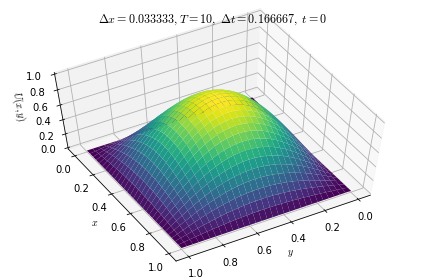

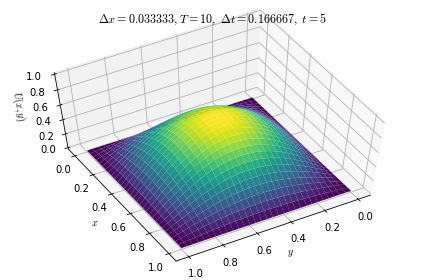

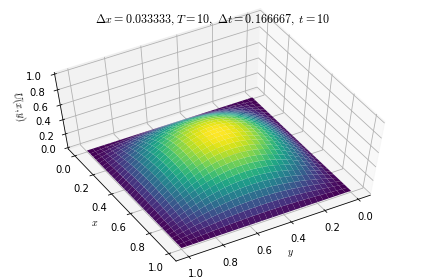

In [6]:
numPlots=3;h=maxX/M # \Delta x and \Delta y
elevation, rotation = 60,60
X,Y,U = ADI(u_0,sigma,D2uRHS,maxX,M,N,T)
plotADI(X,Y,U,T,N, h, numPlots, elevation, rotation)

